In [98]:
import numpy as np 
import matplotlib.pyplot as plt 

from pyMCDS import pyMCDS

In [139]:
index = 130 # 17 , 18 , 19 
filename = 'output%08u.xml' % index 

mcds = pyMCDS(filename , 'output')

Reading output/output00000130.xml
Reading output/initial_mesh0.mat
Reading output/output00000130_microenvironment0.mat
Parsing virion data
Parsing assembled virion data
Parsing interferon 1 data
Parsing pro-inflammatory cytokine data
Parsing chemokine data
Parsing debris data
Reading output/output00000130_cells_physicell.mat


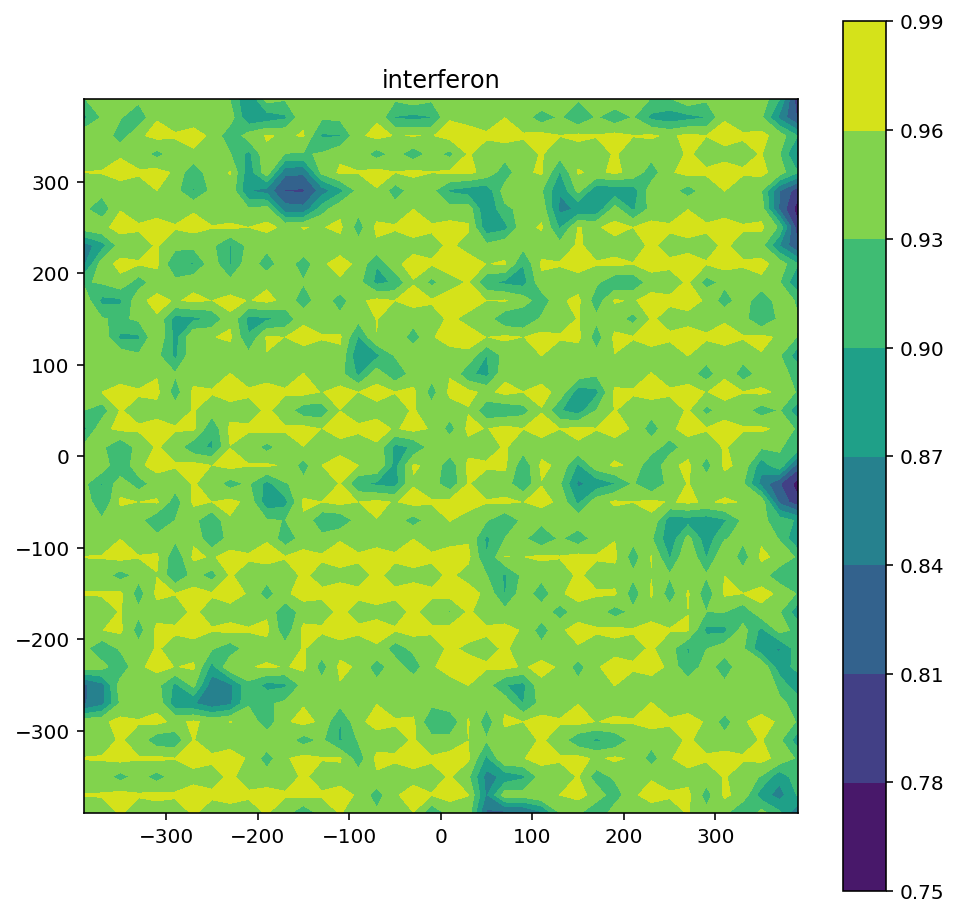

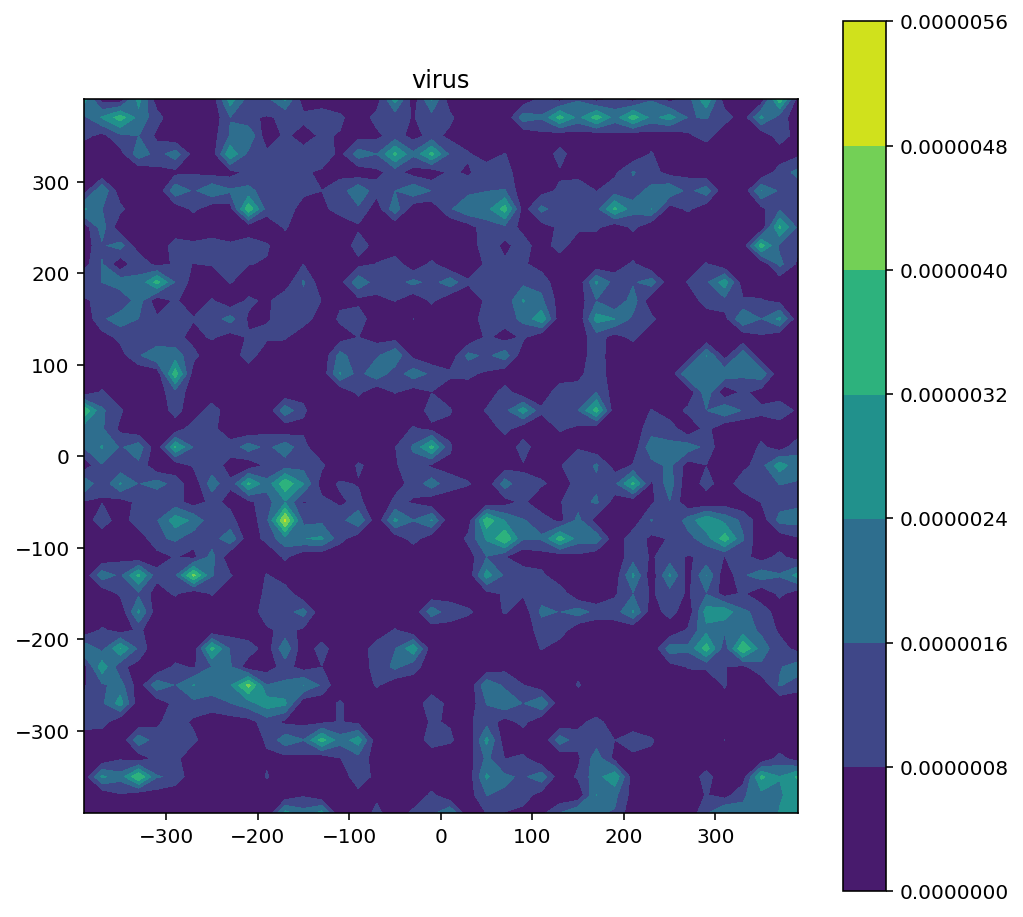

In [140]:
inf1 = mcds.get_concentrations( 'interferon 1' );
vir = mcds.get_concentrations( 'virion');

X,Y = mcds.get_2D_mesh(); 

import matplotlib
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rc('figure' , figsize=[8,8])

plt.figure(1) 
plt.clf()
plt.contourf(X,Y,inf1[:,:,0]);
plt.axis('image')
plt.colorbar() 
plt.title('interferon')
plt.savefig('interferon.png')


plt.figure(2) 
plt.clf()
plt.contourf(X,Y,vir[:,:,0]);
plt.axis('image')
plt.colorbar() 
plt.title('virus')
plt.savefig('virus.png')


In [141]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
rna = mcds.data['discrete_cells']['viral_RNA']

ct = mcds.data['discrete_cells']['cell_type']
cm = mcds.data['discrete_cells']['cycle_model']

epi = np.argwhere( (ct == 1) & (cm < 100) ).flatten() 

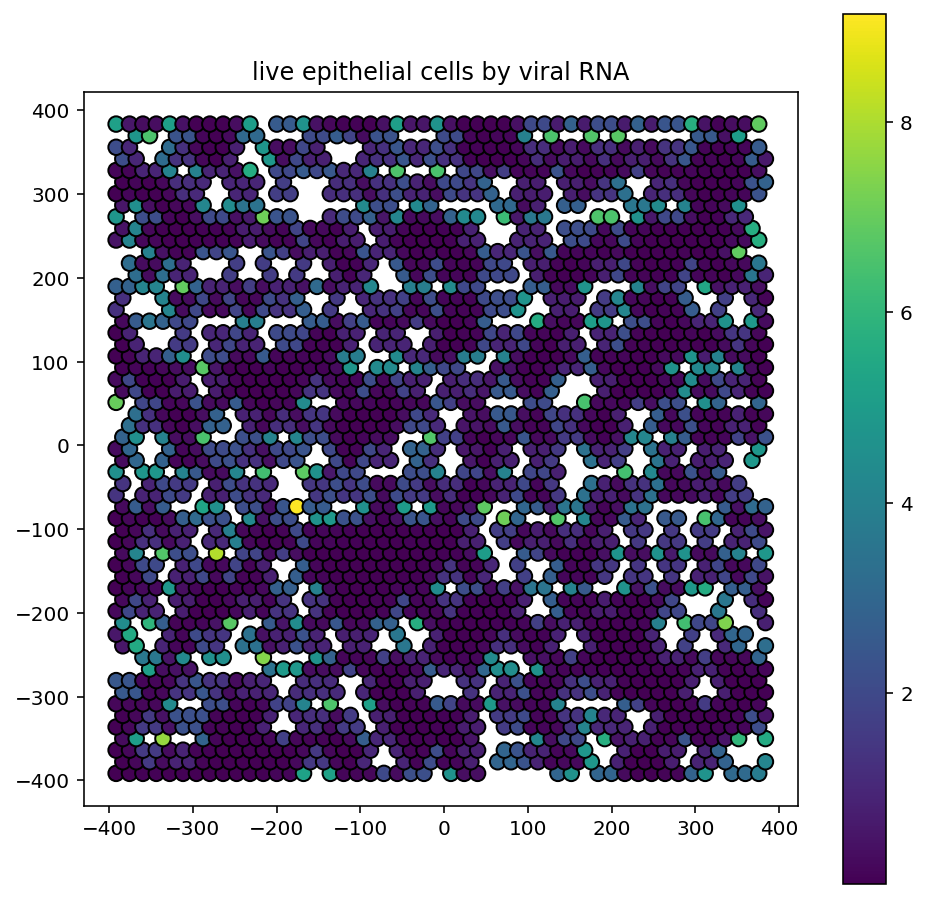

In [142]:
plt.figure(3)
plt.scatter( cx[epi] , cy[epi] , c = rna[epi] , edgecolor='k',s=60)
plt.axis('image')
plt.colorbar()
plt.title('live epithelial cells by viral RNA')
plt.savefig('epi_RNA.png')